In [1]:
import numpy as np # Linear Algebra
import pandas as pd # Data Processing
import matplotlib.pyplot as plt
import sklearn as sns

In [2]:
df = pd.read_csv("D:\AI\Dataset\Social_Network_Ads.csv")

In [28]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [5]:
df.shape

(400, 5)

In [7]:
df.drop('User ID', axis=1, inplace=True)

In [8]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [10]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})

In [11]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


# Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

X = df.drop('Purchased', axis=1) # This the input (X_train)
y = df['Purchased']              # This the output

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
y_train

3      0
18     1
202    1
250    0
274    1
      ..
71     0
106    0
270    0
348    0
102    0
Name: Purchased, Length: 320, dtype: int64

# Applying StandardScaler

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [34]:
X_train_scalled = scaler.fit_transform(X_train)
X_test_scalled = scaler.transform(X_test)

In [36]:
X_train_scalled

array([[-1.        , -1.06675246, -0.38634438],
       [ 1.        ,  0.79753468, -1.22993871],
       [-1.        ,  0.11069205,  1.853544  ],
       [-1.        ,  0.60129393, -0.90995465],
       [-1.        ,  1.87685881, -1.28811763],
       [ 1.        , -0.57615058,  1.44629156],
       [ 1.        ,  0.3069328 , -0.53179168],
       [ 1.        ,  0.99377543,  0.10817643],
       [ 1.        , -1.16487283,  0.45724994],
       [ 1.        , -1.55735433,  0.31180264],
       [ 1.        ,  1.0918958 ,  0.45724994],
       [-1.        , -0.18366908, -0.47361276],
       [ 1.        ,  0.20881242, -0.32816546],
       [-1.        ,  0.3069328 ,  0.28271318],
       [ 1.        , -1.16487283, -1.57901222],
       [-1.        ,  0.11069205,  0.25362372],
       [ 1.        ,  2.07309956,  1.73718616],
       [ 1.        ,  0.40505317, -0.18271817],
       [-1.        ,  1.4843773 ,  2.11534913],
       [ 1.        , -0.37990983,  1.21357589],
       [-1.        ,  1.87685881,  1.504

In [38]:
# Scale the training and testing data
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [39]:
X_train_scaled

,Gender,Age,EstimatedSalary
0,-1.0,-1.066752,-0.386344
1,1.0,0.797535,-1.229939
2,-1.0,0.110692,1.853544
3,-1.0,0.601294,-0.909955
4,-1.0,1.876859,-1.288118
...,...,...,...
315,-1.0,-1.361114,-1.259028
316,-1.0,-1.164873,-1.026312
317,-1.0,0.503174,1.824455
318,1.0,0.110692,0.195445


In [41]:
np.round(X_train.describe())

,Gender,Age,EstimatedSalary
count,320.0,320.0,320.0
mean,0.0,38.0,70281.0
std,1.0,10.0,34431.0
min,0.0,18.0,15000.0
25%,0.0,30.0,43000.0
50%,0.0,37.0,71000.0
75%,1.0,45.0,88000.0
max,1.0,60.0,150000.0


In [42]:
np.round(X_train_scaled.describe())

,Gender,Age,EstimatedSalary
count,320.0,320.0,320.0
mean,0.0,-0.0,0.0
std,1.0,1.0,1.0
min,-1.0,-2.0,-2.0
25%,-1.0,-1.0,-1.0
50%,0.0,-0.0,0.0
75%,1.0,1.0,1.0
max,1.0,2.0,2.0


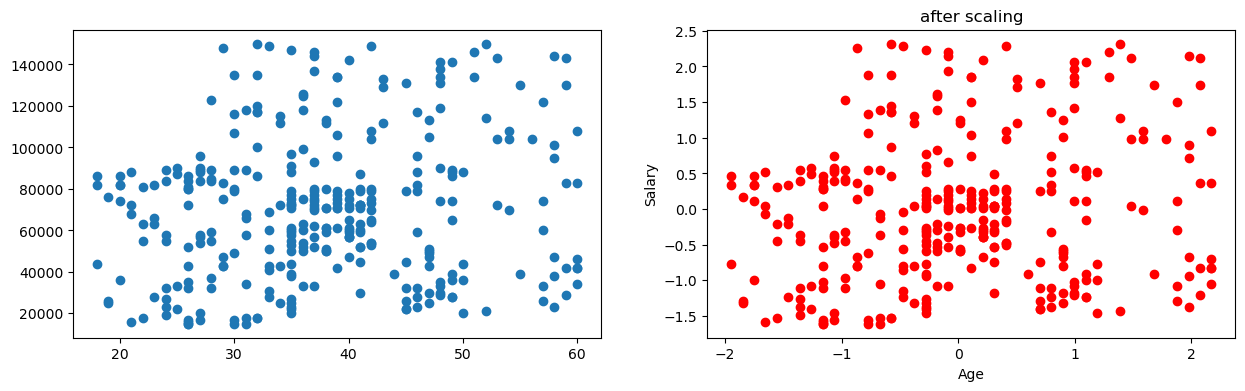

In [44]:
fig,(x1,x2) = plt.subplots(1,2,figsize=(15,4))
x1.scatter(X_train['Age'],X_train['EstimatedSalary'])
plt.title("before")
plt.xlabel("Age")
plt.ylabel('Salary')
x2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
plt.title('after scaling')
plt.xlabel("Age")
plt.ylabel('Salary')
plt.show()